## Imports

In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
from initial import dataset_from_raw, preprocessing as init_processing

from config import Config
import utils
import numpy as np


## Raw Dataset

In [2]:
# !wget https://filebox.ece.vt.edu/~vrama91/CIDEr_miscellanous/cider_datasets.tarB
# !tar -xvf cider_datasets.tar

## Parsing dataset

In [3]:
# dataset_from_raw.dataset_from_raw()
init_processing.annots_preprocessing()


Jenny is telling Mike it is time to go home before they both get in trouble.
There is an owl in the sandbox, which makes Jenny mad and Mike scared.
Mike and Jenny are having an argument at the sandbox.
Jenny is angry and Mike is scared because there is an owl in the sandbox.
Jenny is upset because Mike does not like her owl friend.
Mike and Jenny are upset that there is an owl in their sandbox.
Jenny is angry at Mike for playing in the sandbox.
Mike and Jenny are disgusted by the owl that landed in the sandbox.
An angry Jenny watches while an owl scares Mike in the sandbox.
Jenny is mad at Mike for playing in the sandbox with an owl.
Angry Jenny is watching sad Mike in the sandbox.
Jenny is trying to scare an owl away from Mike
Mike doesn't know what to say to Jenny because she is angry about something.
JENNY IS ANGRY AT MIKE AND THE OWL, WHO ARE IN THE SANDBOX.
Angry Jenny throws an owl into Mike's sandbox.
An angry Jenny looks at Mike as he sits in a sandbox with an owl.
Jenny is an

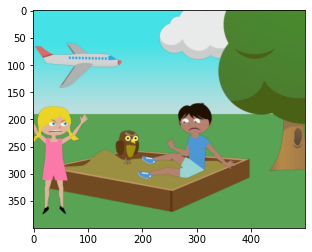

In [27]:
utils.show_example(Config.abstract50s, 3)

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [15]:
def processing(sentence, target):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc]
    for label in Config.labels:
        if label == 'dining table':
            if 'table' in tokens:
                target[Config.label_dict[label]] = 1
        elif label == 'potted plant':
            if 'plant' in tokens:
                target[Config.label_dict[label]] = 1
        elif label in tokens:
            target[Config.label_dict[label]] = 1

    for token in doc.ents:
        if token.label_ == 'PERSON':
            target[Config.label_dict['person']] = 1

In [21]:
targets = []
for i in range(Config.abstract50s['size']):
    annots = utils.get_annots(Config.abstract50s, i).split('\n')
    target = [0 for _ in range(len(Config.labels))]
    for annot in annots:
        processing(annot, target)

    targets.append(target)


In [22]:
def check(dataset, targets, index):
    plt.imshow(utils.get_image(dataset, index))
    d = dict(zip(Config.labels, targets[index]))
    return {k for k, v in d.items() if v==1}

{'person'}

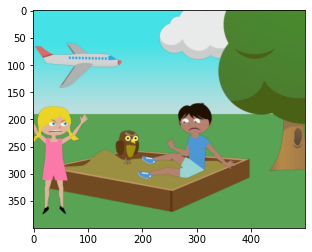

In [26]:
check(Config.abstract50s, targets, 3)